*Fb* Prophet 

https://facebook.github.io/prophet/docs/saturating_forecasts.html


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
cd ../gdrive/My Drive/Colab Notebooks/time_series

In [ ]:
import pandas as pd

# https://www.kaggle.com/competitions/recruit-restaurant-visitor-forecasting/data?select=air_visit_data.csv.zip

y = pd.read_csv('air_visit_data.csv')
y.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [ ]:
y = y.pivot(index='visit_date', columns='air_store_id')['visitors']
y.head()

air_store_id,air_00a91d42b08b08d9,air_0164b9927d20bcc3,air_0241aa3964b7f861,air_0328696196e46f18,air_034a3d5b40d5b1b1,air_036d4f1ee7285390,air_0382c794b73b51ad,air_03963426c9312048,air_04341b588bde96cd,air_049f6d5b402a31b2,...,air_fd6aac1043520e83,air_fdc02ec4a3d21ea4,air_fdcfef8bd859f650,air_fe22ef5a9cbef123,air_fe58c074ec1445ea,air_fea5dc9594450608,air_fee8dcf4d619598e,air_fef9ccb3ba0da2f7,air_ffcc2d5087e1b476,air_fff68b929994bfbd
visit_date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,9.0,NaN,NaN,NaN,NaN,62.0,23.0,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,17.0,NaN,NaN,NaN,NaN,30.0,35.0,NaN,...,36.0,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
y = y.fillna(0)

In [ ]:
y = pd.DataFrame(y.sum(axis=1))

In [ ]:
y.head()

,0
visit_date,
2016-01-01,1033.0
2016-01-02,1764.0
2016-01-03,2368.0
2016-01-04,3326.0
2016-01-05,3927.0


In [ ]:
# When building a Prophet model, you are always obliged to have a dataset with the columns ‘ds’ and ‘y’. 
# This is how the model recognizes the date column (‘ds’) and the dependent variable (‘y’). 

y = y.reset_index(drop=False)
y.columns = ['ds', 'y']

In [ ]:
y.head()

,ds,y
0,2016-01-01,1033.0
1,2016-01-02,1764.0
2,2016-01-03,2368.0
3,2016-01-04,3326.0
4,2016-01-05,3927.0


In [ ]:
y.shape

(478, 2)

In [ ]:
# Creating a train-test split
train = y.iloc[:450,:]
test = y.iloc[450:,:]

In [ ]:
train.tail()

,ds,y
445,2017-03-21,11987.0
446,2017-03-22,15101.0
447,2017-03-23,15879.0
448,2017-03-24,20720.0
449,2017-03-25,22836.0


In [ ]:
test.tail()

,ds,y
473,2017-04-18,13489.0
474,2017-04-19,14607.0
475,2017-04-20,13990.0
476,2017-04-21,19624.0
477,2017-04-22,21245.0


In [ ]:
from fbprophet import Prophet
# https://facebook.github.io/prophet/docs/quick_start.html

m = Prophet()
m.fit(train)

In [ ]:
len(test)

28

In [ ]:
#  use a Prophet function to create a future dataframe that will be an input to the predict function. 
future = m.make_future_dataframe(periods=len(test))
future.head(), future.shape

(          ds
 0 2016-01-01
 1 2016-01-02
 2 2016-01-03
 3 2016-01-04
 4 2016-01-05, (478, 1))

In [ ]:
# use predict function 
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,4169.198175,3592.018576,9442.161820,4169.198175,4169.198175,2399.959624,2399.959624,2399.959624,2399.959624,2399.959624,2399.959624,0.0,0.0,0.0,6569.157799
1,2016-01-02,4190.481266,5219.402605,10849.110379,4190.481266,4190.481266,3841.660175,3841.660175,3841.660175,3841.660175,3841.660175,3841.660175,0.0,0.0,0.0,8032.141441
2,2016-01-03,4211.764358,608.258451,6354.239317,4211.764358,4211.764358,-459.818639,-459.818639,-459.818639,-459.818639,-459.818639,-459.818639,0.0,0.0,0.0,3751.945719
3,2016-01-04,4233.047449,-1513.351227,4159.861784,4233.047449,4233.047449,-2942.789499,-2942.789499,-2942.789499,-2942.789499,-2942.789499,-2942.789499,0.0,0.0,0.0,1290.257950
4,2016-01-05,4254.330540,-69.098021,5485.774134,4254.330540,4254.330540,-1660.854491,-1660.854491,-1660.854491,-1660.854491,-1660.854491,-1660.854491,0.0,0.0,0.0,2593.476049


In [ ]:
forecast.shape

(478, 16)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(list(test['y']), list(forecast.loc[450:,'yhat'] )))

0.8084861773228342


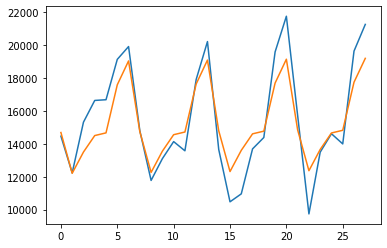

In [ ]:
# Let’s see how the model is fitting, by plotting the forecast against the test data.
import matplotlib.pyplot as plt
plt.plot(list(test['y']))
plt.plot(list(forecast.loc[450:,'yhat'] ))
plt.show()

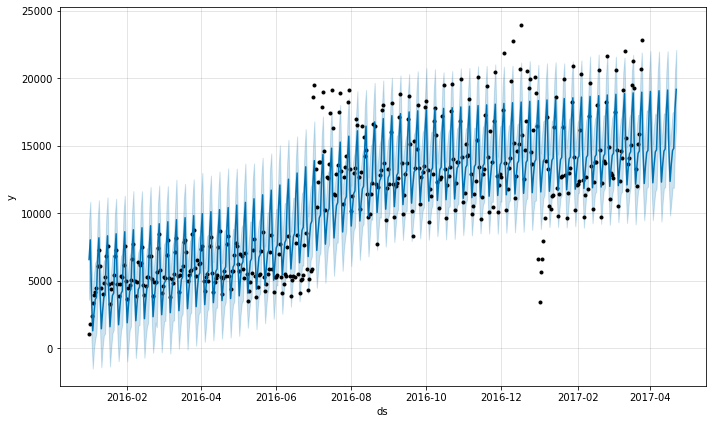

In [ ]:
# the forecast against the observed data points for the past and future data. 
fig1 = m.plot(forecast)
plt.show()

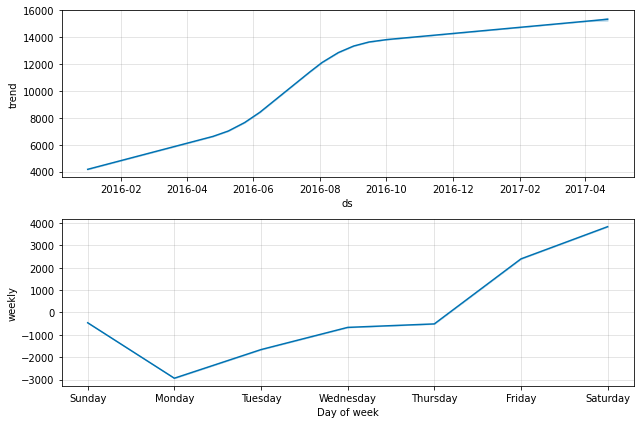

In [ ]:
# decomposition of the different impacts of the model. 
# This means that the decomposition can show you the impact of the different seasonalities at each time step

fig2 = m.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.7877769983422085


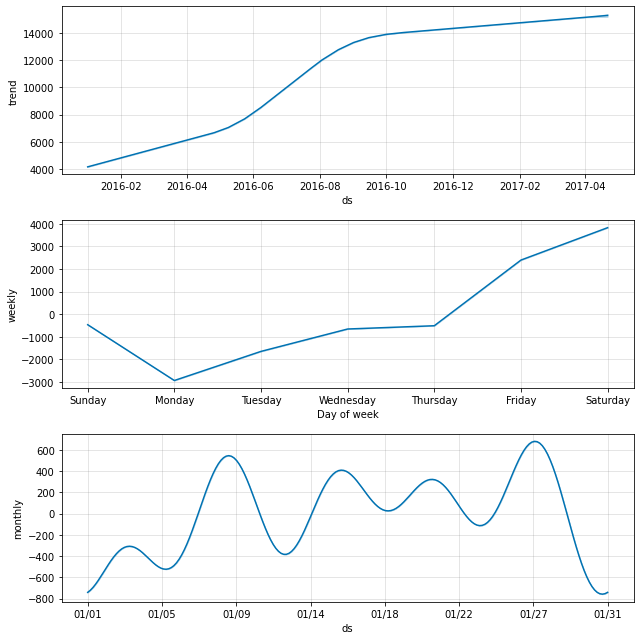

In [ ]:
# Adding Seasonality effect

m2 = Prophet()
m2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m2.fit(train)

future2 = m2.make_future_dataframe(periods=len(test))
forecast2 = m2.predict(future)

print(r2_score(list(test['y']), list(forecast2.loc[450:,'yhat'] )))

fig2 = m2.plot_components(forecast2)
plt.show()

In [ ]:
# Adding Holiday Data to Basic Prophet
holidays = pd.read_csv('air_date_info.csv')
holidays.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [ ]:
holidays = holidays[holidays['holiday_flg'] == 1]
holidays = holidays[['calendar_date', 'holiday_flg']]
holidays = holidays.drop(['holiday_flg'], axis=1)
holidays['holiday'] = 'holiday'
holidays.columns = ['ds', 'holiday']

In [ ]:
holidays.head()

,ds,holiday
0,2016-01-01,holiday
1,2016-01-02,holiday
2,2016-01-03,holiday
10,2016-01-11,holiday
41,2016-02-11,holiday


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.8062679163389088


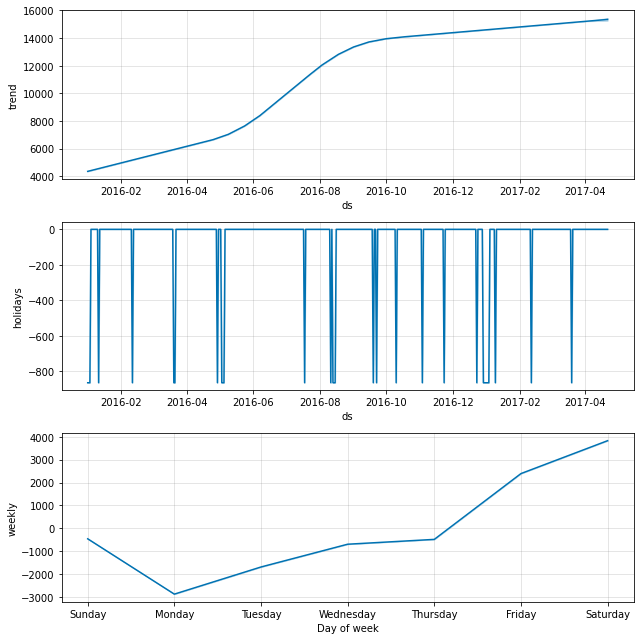

In [ ]:
m3 = Prophet(holidays=holidays)

m3.fit(train)

future3 = m3.make_future_dataframe(periods=len(test))

forecast3 = m3.predict(future)

print(r2_score(list(test['y']), list(forecast3.loc[450:,'yhat'] )))

fig2 = m3.plot_components(forecast3)
plt.show()

In [ ]:
# Add reservations to the model

X_reservations = pd.read_csv('air_reserve.csv')
X_reservations.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [ ]:
X_reservations['visit_date'] = pd.to_datetime(X_reservations['visit_datetime']).dt.date
X_reservations = pd.DataFrame(X_reservations.groupby('visit_date')['reserve_visitors'].sum())
X_reservations = X_reservations.reset_index(drop = False)

X_reservations.head()

,visit_date,reserve_visitors
0,2016-01-01,17
1,2016-01-02,128
2,2016-01-03,53
3,2016-01-04,122
4,2016-01-05,76


In [ ]:
train4 = train.copy()
train4['ds'] = pd.to_datetime(train4['ds']).dt.date
train4 = train4.merge(X_reservations, left_on = 'ds', 
                      right_on = 'visit_date', 
                      how = 'left')[['ds', 'y', 'reserve_visitors']].fillna(0)

train4.head()                      

,ds,y,reserve_visitors
0,2016-01-01,1033.0,17.0
1,2016-01-02,1764.0,128.0
2,2016-01-03,2368.0,53.0
3,2016-01-04,3326.0,122.0
4,2016-01-05,3927.0,76.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.848896648390201


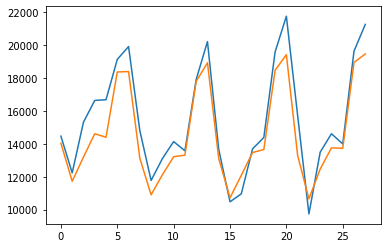

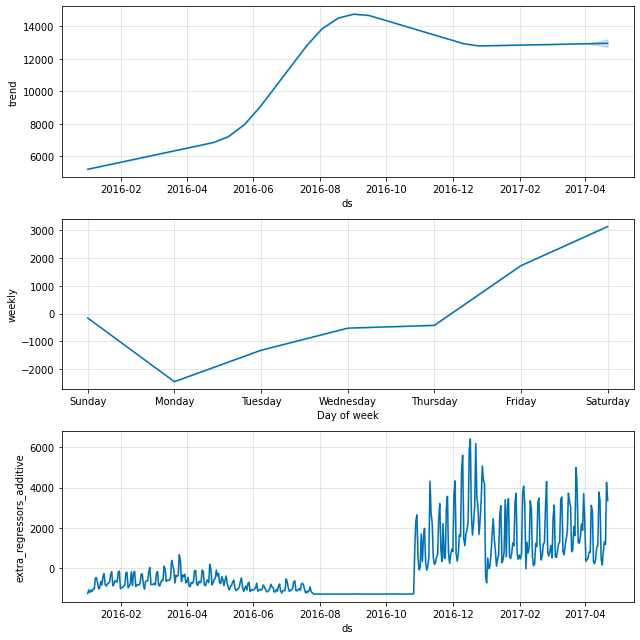

In [ ]:
# Add reservations to the model

m4 = Prophet()
m4.add_regressor('reserve_visitors')
m4.fit(train4)
future4 = m4.make_future_dataframe(periods=len(test))
future4['ds'] = pd.to_datetime(future4['ds']).dt.date

future4 = future4.merge(X_reservations, left_on = 'ds', right_on = 'visit_date', how = 'left')[['ds', 'reserve_visitors']].fillna(0)

forecast4 = m4.predict(future4)

print(r2_score(list(test['y']), list(forecast4.loc[450:,'yhat'] )))

plt.plot(list(test['y']))
plt.plot(list(forecast4.loc[450:,'yhat'] ))

fig2 = m4.plot_components(forecast4)
plt.show()


### Grid Search 

In [ ]:
def model_test(holidays, weekly_seasonality,
yearly_seasonality, add_monthly, add_reserve, changepoint_prior_scale, holidays_prior_scale, month_fourier):
    
    m4 = Prophet(
        yearly_seasonality=yearly_seasonality, 
        weekly_seasonality=weekly_seasonality, 
        holidays=holidays, 
        changepoint_prior_scale=changepoint_prior_scale, 
        holidays_prior_scale=holidays_prior_scale)
    
    if add_monthly:    
        m4.add_seasonality(
            name='monthly', 
            period=30.5, 
            fourier_order=month_fourier)
    
    if add_reserve:
        m4.add_regressor('reserve_visitors')

    m4.fit(train4)

    future4 = m4.make_future_dataframe(periods=len(test))

    future4['ds'] = pd.to_datetime(future4['ds']).dt.date
    
    if add_reserve:
        future4 = future4.merge(
            X_reservations, 
            left_on = 'ds', 
            right_on = 'visit_date', 
            how = 'left')
        future4 = future4[['ds', 'reserve_visitors']]
        future4 = future4.fillna(0)
        forecast4 = m4.predict(future4)
    return r2_score(
            list(test['y']),
            list(forecast4.loc[450:,'yhat'] )) 

In [ ]:
# Setting the grid
holidays_opt = [holidays, None]
weekly_seas = [ 5, 10, 30, 50]
yearly_seas = [ 5, 10, 30, 50]
add_monthly = [True, False]
add_reserve = [True, False]
changepoint_prior_scale = [0.1, 0.3, 0.5]
holidays_prior_scale = [0.1, 0.3, 0.5]
month_fourier = [5, 10, 30, 50]

In [ ]:
# Looping through the grid
grid_results = []
for h in holidays_opt:
  for w in weekly_seas:
    for ys in yearly_seas:
      for m in add_monthly:
        for r in add_reserve:
           for c in changepoint_prior_scale:
             for hp in holidays_prior_scale:
               for mf in month_fourier:
                  r2=model_test(h,w,ys,m,r,c,hp,mf)
                  print([w,ys,m,r,c,hp,mf,r2])
                  grid_results.append([h,w,ys,m,r,c,hp,mf,r2])

In [ ]:
# adding it all to a dataframe and extract the best model
benchmark = pd.DataFrame(grid_results)
benchmark = benchmark.sort_values(8, ascending=False)

h, w,ys, m, r, c,hp,mf,r2 = list(benchmark.iloc[0,:])

In [ ]:
# Fit the Prophet with those best hyperparameters
m4 = Prophet(
yearly_seasonality=ys, 
weekly_seasonality=w, 
holidays=h, 
changepoint_prior_scale=c, 
holidays_prior_scale=hp)
    
if m:    
    m4.add_seasonality(
name='monthly', 
period=30.5, 
fourier_order=mf)

if r:
    m4.add_regressor('reserve_visitors')

m4.fit(train4)

future4 = m4.make_future_dataframe(periods=len(test))

future4['ds'] = pd.to_datetime(future4['ds']).dt.date

if r:
    future4 = future4.merge(
X_reservations, 
left_on = 'ds', 
right_on = 'visit_date', 
how = 'left')
    future4 = future4[['ds', 'reserve_visitors']]
    future4 = future4.fillna(0)

forecast4 = m4.predict(future4)